In [31]:
import pandas as pd
import matplotlib.pyplot as plt                      
import seaborn as sns
import numpy as np

In [32]:
# 한글 폰트 설정
import matplotlib as mpl
mpl.rcParams['font.family']='NanumGothic'

In [33]:
# 데이터 로드
school_health=pd.read_csv('../../data/school_health_preprocessed.csv')

# 검정에 필요한 요소 구별
data=school_health[["아침식사","BMI","성별","학교급"]]
print("데이터 샘플")
print(data.head())

# 데이터 형태 파악
print(data.info())

# 5. 결측치 확인
print("\n결측치 확인:")
print(data.isnull().sum())

#데이터 결측치 제거
data=data[data['아침식사'].notna()]

# 데이터 통일
mapping = {1: 4, 2: 3, 3: 2, 4: 1}
data['아침식사'] = data['아침식사'].map(mapping)

데이터 샘플
   아침식사        BMI 성별 학교급
0   1.0  15.667728  여   초
1   1.0  15.644444  여   초
2   4.0  15.159148  여   초
3   4.0  22.701628  여   초
4   1.0  14.870556  여   초
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84871 entries, 0 to 84870
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   아침식사    82497 non-null  float64
 1   BMI     84871 non-null  float64
 2   성별      84871 non-null  object 
 3   학교급     84871 non-null  object 
dtypes: float64(2), object(2)
memory usage: 2.6+ MB
None

결측치 확인:
아침식사    2374
BMI        0
성별         0
학교급        0
dtype: int64


In [35]:
# 데이터 분포 비율을 확인
counts = data['아침식사'].value_counts()
print(counts)

# BMI의 기초통계량
print("\n BMI 기초통계량")
print(data['BMI'].describe())

# 아침식사 빈도 별 BMI 평균
bre_bmi = data.groupby('아침식사')['BMI'].mean()
print("\n아침식사 빈도 별 BMI 평균:")
print(bre_bmi)

아침식사
4    37443
3    19134
1    14789
2    10659
Name: count, dtype: int64

 BMI 기초통계량
count    82025.000000
mean        20.483191
std          3.904233
min          9.511473
25%         17.533728
50%         20.061728
75%         22.952651
max         31.228390
Name: BMI, dtype: float64

아침식사 빈도 별 BMI 평균:
아침식사
1    21.475665
2    21.012710
3    20.389069
4    19.988548
Name: BMI, dtype: float64


Text(0, 0.5, '학생 수')

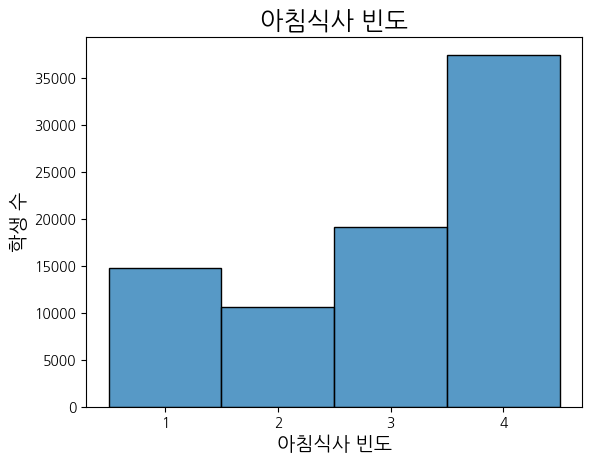

In [36]:
# 데이터 분포 그래프로 확인
sns.histplot(data=data, x='아침식사', discrete=True, kde=False)
plt.xticks([1, 2, 3, 4])
plt.title('아침식사 빈도', fontsize=18)
plt.xlabel('아침식사 빈도', fontsize=14)
plt.ylabel('학생 수', fontsize=14)

Text(0, 0.5, '학생 수')

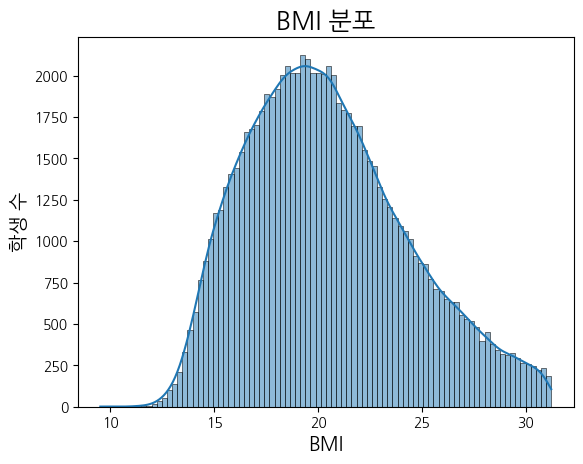

In [37]:
# BMI의 분포 파악
sns.histplot(data['BMI'], kde=True)
plt.title('BMI 분포', fontsize=18)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('학생 수', fontsize=14)

Text(0, 0.5, 'BMI')

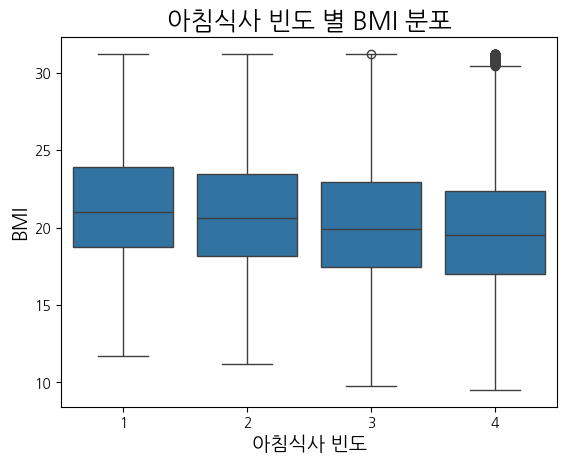

In [38]:
# 각 설문에 따른 BMI 분포 파악
sns.boxplot(data=data, x='아침식사', y='BMI')
plt.title('아침식사 빈도 별 BMI 분포', fontsize=18)
plt.xlabel('아침식사 빈도', fontsize=14)
plt.ylabel('BMI', fontsize=14)
# 아침식사 빈도 별 BMI 분포의 차이 확인


성별 분포:
성별
남    41462
여    40563
Name: count, dtype: int64

 아침식사 빈도 별 성별 분포:
아침식사  성별
1     여      7583
      남      7206
2     여      5623
      남      5036
3     여      9718
      남      9416
4     남     19804
      여     17639
Name: count, dtype: int64


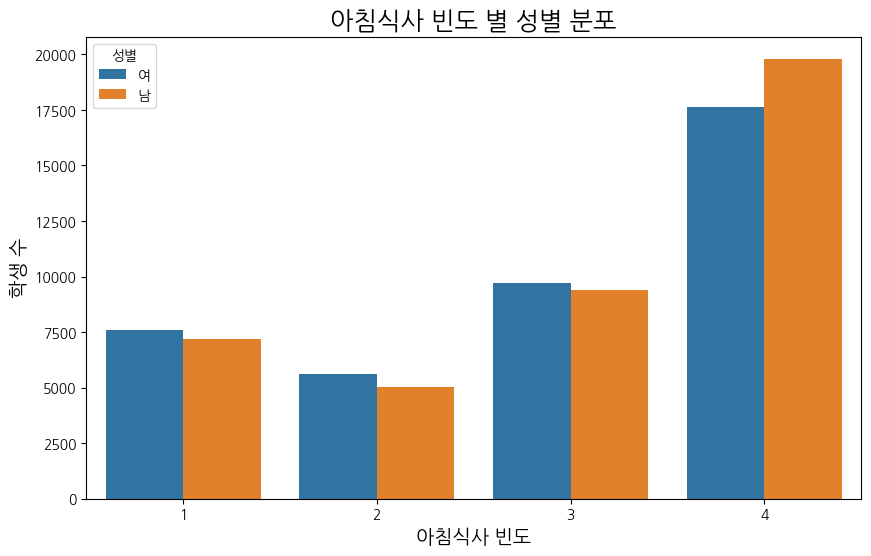

In [39]:
# 아침식사 빈도와 관련이 있을 요소 2가지 중 첫번째 - 성별
print("\n성별 분포:")
print(data['성별'].value_counts())

# 8. 아침식사 빈도 별 성별 분포 확인
print("\n 아침식사 빈도 별 성별 분포:")
breakfast_gender = data.groupby('아침식사')['성별'].value_counts()
print(breakfast_gender)

# 8-1. 아침식사 빈도 별 성별 비율 시각화
plt.figure(figsize=(10, 6))
sns.countplot(x='아침식사', hue='성별', data=data)
plt.title('아침식사 빈도 별 성별 분포', fontsize=18)
plt.xlabel('아침식사 빈도', fontsize=14)
plt.ylabel('학생 수', fontsize=14)
plt.legend(title='성별')
plt.show()

# 성별 간의 아침식사 빈도가 차이가 있는 것으로 보임

In [40]:
# 아침식사 하는 횟수와 성별의 독립성 확인 (카이제곱 검정)
contingency_table = pd.crosstab(data["아침식사"], data['성별'])
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("아침식사 빈도와 성별의 독립성 확인")
print(f"\n카이제곱 통계량: {chi2:.4f}")
print(f"p-value: {p}")
print(f"자유도: {dof}")
# 검사 결과 아침 식사 빈도와 성별은 독립적이라는 귀무가설 기각하고 유의미한 연관성 있다 판단 가능

아침식사 빈도와 성별의 독립성 확인

카이제곱 통계량: 162.0529
p-value: 6.608109519339887e-35
자유도: 3



학교급 분포:
학교급
초    32657
고    26572
중    22796
Name: count, dtype: int64

 아침식사 빈도 별 학교급 분포:
아침식사  학교급
1     고       7073
      중       4999
      초       2717
2     고       4284
      초       3288
      중       3087
3     초       8048
      고       5865
      중       5221
4     초      18604
      중       9489
      고       9350
Name: count, dtype: int64


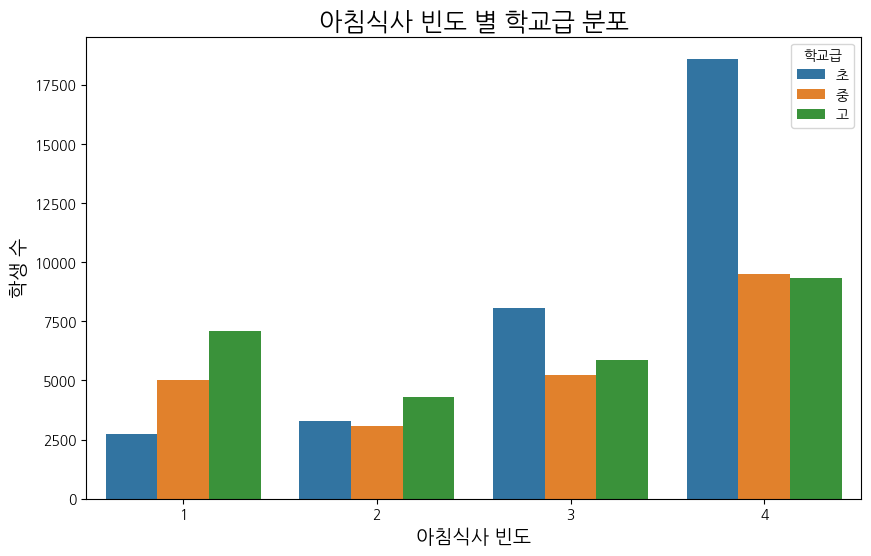

In [41]:
# 아침식사 빈도와 관련이 있을 요소 2가지 중 두번째 - 학교급
print("\n학교급 분포:")
print(data['학교급'].value_counts())

# 8. 아침식사 빈도 별 성별 분포 확인
print("\n 아침식사 빈도 별 학교급 분포:")
breakfast_gender = data.groupby('아침식사')['학교급'].value_counts()
print(breakfast_gender)

# 8-1. 아침식사 빈도 별 성별 비율 시각화
plt.figure(figsize=(10, 6))
sns.countplot(x='아침식사', hue='학교급',data=data)
plt.title('아침식사 빈도 별 학교급 분포', fontsize=18)
plt.xlabel('아침식사 빈도', fontsize=14)
plt.ylabel('학생 수', fontsize=14)
plt.legend(title='학교급')
plt.show()
# 결과 학교급마다 확실하게 차이가 있는 것으로 파악

In [42]:
# 아침식사 하는 횟수와 학교급의 독립성 확인
contingency_table = pd.crosstab(data["아침식사"], data['학교급'])
print("\n아침식사와 학교급의 교차표:")
print(contingency_table)

from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\n카이제곱 통계량: {chi2:.4f}")
print(f"p-value: {p}")
print(f"자유도: {dof}")
# 검사 결과 아침 식사 빈도와 학교급이 독립적이라는 귀무 가설을 기각하고  유의마한 연관성이 있다 판단 가능


아침식사와 학교급의 교차표:
학교급      고     중      초
아침식사                   
1     7073  4999   2717
2     4284  3087   3288
3     5865  5221   8048
4     9350  9489  18604

카이제곱 통계량: 5086.0027
p-value: 0.0
자유도: 6


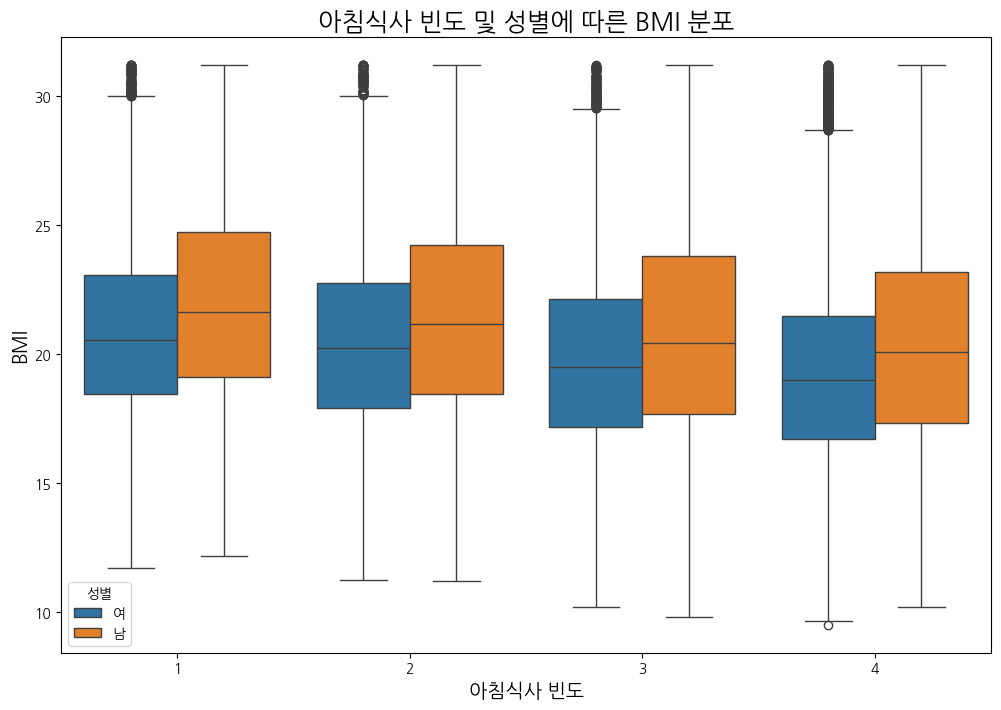

In [43]:
# 아침 식사 빈도와 성별에 따른 BMI 분포의 차이를 시각화
plt.figure(figsize=(12, 8))
sns.boxplot(x='아침식사', y='BMI', hue='성별', data=data)
plt.title('아침식사 빈도 및 성별에 따른 BMI 분포', fontsize=18)
plt.xlabel('아침식사 빈도', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.legend(title='성별')
plt.show()
# 결과 아침 식사 빈도가 커질 수록 bmi가 감소하는 경향을 보임

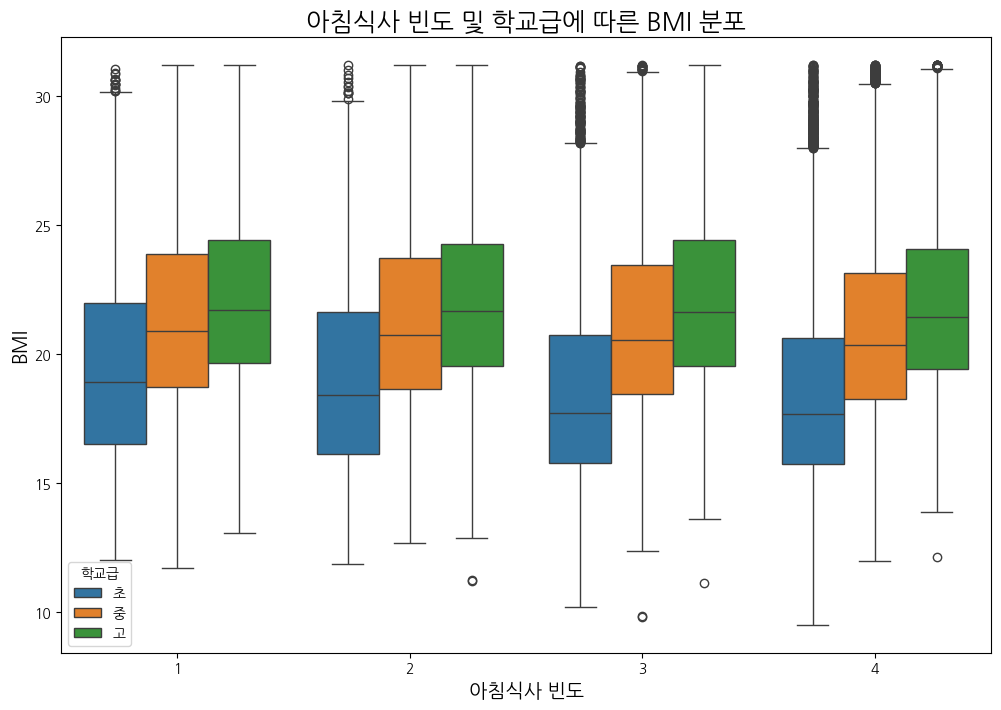

In [44]:
# 아침 식사 빈도와 학교급에 따른 BMI 분포의 차이를 시각화
plt.figure(figsize=(12, 8))
sns.boxplot(x='아침식사', y='BMI', hue='학교급', data=data)
plt.title('아침식사 빈도 및 학교급에 따른 BMI 분포', fontsize=18)
plt.xlabel('아침식사 빈도', fontsize=14)
plt.ylabel("BMI", fontsize=14)
plt.legend(title='학교급')
plt.show()
# 결과 아침 식사 빈도가 커질 수록 bmi가 감소하는 경향을 보임

In [45]:
# 성별별 아침식사 빈도와 BMI 상관 계수 계산
print("\n성별별 아침식사 빈도와 BMI의 상관계수:")
for gender in data['성별'].unique():
    subset = data[data['성별'] == gender]
    corr = subset['아침식사'].corr(subset['BMI'])
    print(f"{gender} 학생의 상관계수: {corr:.4f}")
# 결과 성별 구분 없이 모두 음의 상관 계수를 가짐


성별별 아침식사 빈도와 BMI의 상관계수:
여 학생의 상관계수: -0.1693
남 학생의 상관계수: -0.1378


In [46]:
# 학교급별 아침식사 빈도와 BMI 상관 계수 계산
print("\n학교급별 아침식사 빈도와 BMI의 상관계수:")
for school in data['학교급'].unique():
    subset = data[data['학교급'] == school]
    corr = subset['아침식사'].corr(subset['BMI'])
    print(f"{school} 학생의 상관계수: {corr:.4f}")
    # 결과 성별 구분 없이 모두 음의 상관 계수를 가짐


학교급별 아침식사 빈도와 BMI의 상관계수:
초 학생의 상관계수: -0.0873
중 학생의 상관계수: -0.0574
고 학생의 상관계수: -0.0247


In [52]:
# 성별과 학교급을 기준으로 나눈 6가지 분포
bmi_wel = data[(data['성별'] == '여') & (data['학교급'] == '초')]
bmi_wmid = data[(data['성별'] == '여') & (data['학교급'] == '중')]
bmi_whigh = data[(data['성별'] == '여') & (data['학교급'] == '고')]
bmi_mel = data[(data['성별'] == '남') & (data['학교급'] == '초')]
bmi_mmid = data[(data['성별'] == '남') & (data['학교급'] == '중')]
bmi_mhigh = data[(data['성별'] == '남') & (data['학교급'] == '고')]

상관계수: -0.11


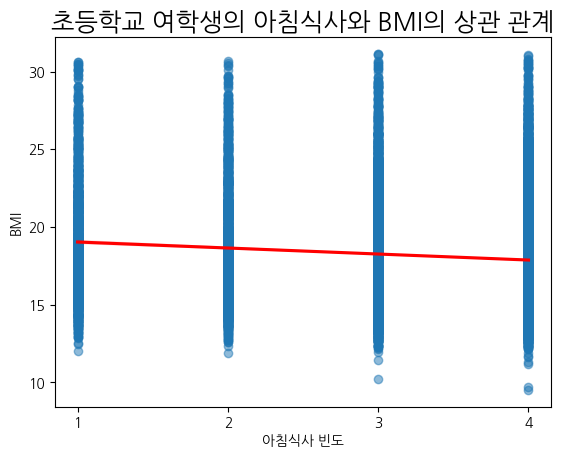

In [53]:
# 성별이 여자이며 초등학생인 경우 아침식사 빈도와 BMI가 관계가 있는지 plot으로 확인
correlation = bmi_wel['아침식사'].corr(bmi_wel['BMI'])
print(f"상관계수: {correlation:.2f}")
sns.regplot(data=bmi_wel, x='아침식사', y='BMI', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xticks([1, 2, 3, 4])
plt.title('초등학교 여학생의 아침식사와 BMI의 상관 관계', fontsize=18)
plt.xlabel('아침식사 빈도')
plt.ylabel('BMI')
plt.show()
# 결과 관계가 있으나 강한 관계는 아닌 것으로 추정

상관계수: -0.09


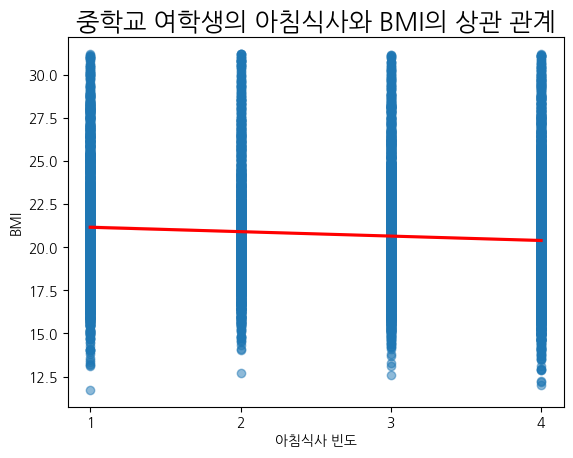

In [54]:
# 성별이 여자이며 초등학생인 경우 아침식사 빈도와 BMI가 관계가 있는지 plot으로 확인
correlation = bmi_wmid['아침식사'].corr(bmi_wmid['BMI'])
print(f"상관계수: {correlation:.2f}")
sns.regplot(data=bmi_wmid, x='아침식사', y='BMI', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xticks([1, 2, 3, 4])
plt.title('중학교 여학생의 아침식사와 BMI의 상관 관계', fontsize=18)
plt.xlabel('아침식사 빈도')
plt.ylabel('BMI')
plt.show()
# 결과 관계가 있으나 약한 관계로 추정

상관계수: -0.03


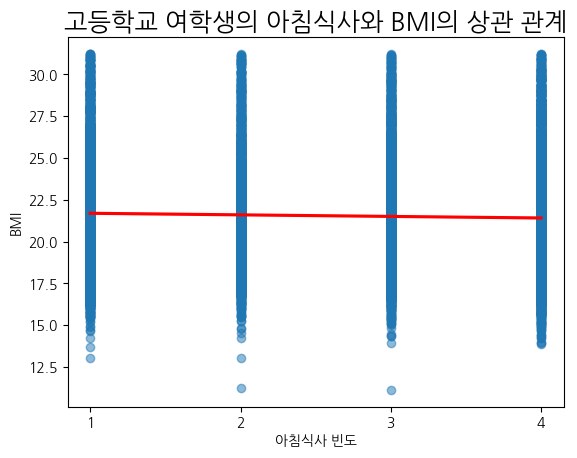

In [55]:
# 성별이 여자이며 초등학생인 경우 아침식사 빈도와 BMI가 관계가 있는지 plot으로 확인
correlation = bmi_whigh['아침식사'].corr(bmi_whigh['BMI'])
print(f"상관계수: {correlation:.2f}")
sns.regplot(data=bmi_whigh, x='아침식사', y='BMI', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xticks([1, 2, 3, 4])
plt.title('고등학교 여학생의 아침식사와 BMI의 상관 관계', fontsize=18)
plt.xlabel('아침식사 빈도')
plt.ylabel('BMI')
plt.show()
# 결과 관계가 있으나 약한 관계로 추정

상관계수: -0.08


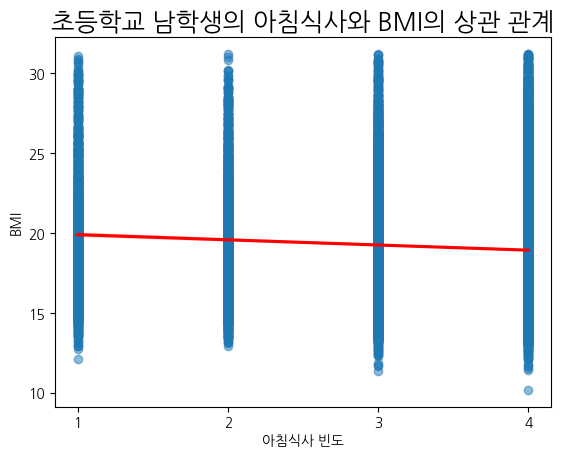

In [56]:
# 성별이 여자이며 초등학생인 경우 아침식사 빈도와 BMI가 관계가 있는지 plot으로 확인
correlation = bmi_mel['아침식사'].corr(bmi_mel['BMI'])
print(f"상관계수: {correlation:.2f}")
sns.regplot(data=bmi_mel, x='아침식사', y='BMI', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xticks([1, 2, 3, 4])
plt.title('초등학교 남학생의 아침식사와 BMI의 상관 관계', fontsize=18)
plt.xlabel('아침식사 빈도')
plt.ylabel('BMI')
plt.show()
# 결과 관계가 있으나 약한 관계로 추정

상관계수: -0.04


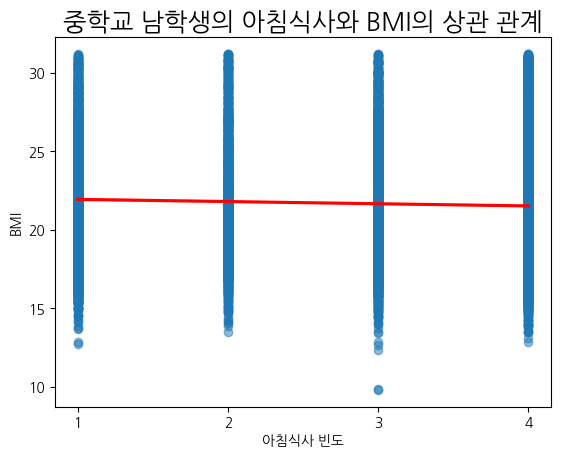

In [57]:
# 성별이 여자이며 초등학생인 경우 아침식사 빈도와 BMI가 관계가 있는지 plot으로 확인
correlation = bmi_mmid['아침식사'].corr(bmi_mmid['BMI'])
print(f"상관계수: {correlation:.2f}")
sns.regplot(data=bmi_mmid, x='아침식사', y='BMI', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xticks([1, 2, 3, 4])
plt.title('중학교 남학생의 아침식사와 BMI의 상관 관계', fontsize=18)
plt.xlabel('아침식사 빈도')
plt.ylabel('BMI')
plt.show()
# 결과 관계가 있으나 약한 관계로 추정

상관계수: -0.02


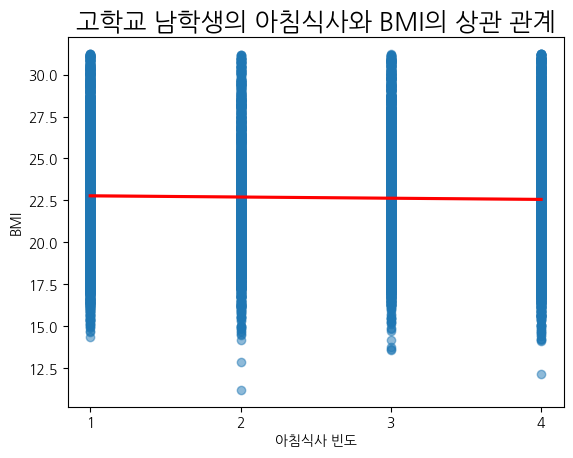

In [58]:
# 성별이 여자이며 초등학생인 경우 아침식사 빈도와 BMI가 관계가 있는지 plot으로 확인
correlation = bmi_mhigh['아침식사'].corr(bmi_mhigh['BMI'])
print(f"상관계수: {correlation:.2f}")
sns.regplot(data=bmi_mhigh, x='아침식사', y='BMI', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xticks([1, 2, 3, 4])
plt.title('고학교 남학생의 아침식사와 BMI의 상관 관계', fontsize=18)
plt.xlabel('아침식사 빈도')
plt.ylabel('BMI')
plt.show()
# 결과 관계가 없는 것으로 추정